In [ ]:
import os
import subprocess
import shutil
import sys
import numpy as np
import anndata as ad
import pandas as pd
from varseek.utils import create_identity_t2g

varseek_directory = os.path.dirname(os.path.abspath(""))

conda_env_path = os.path.dirname(os.path.dirname(shutil.which("kb")))  # to get kb path
operating_system = "linux" if sys.platform.startswith("linux") else "darwin/m1"

kallisto = f"{conda_env_path}/lib/python3.10/site-packages/kb_python/bins/{operating_system}/kallisto/kallisto"  # or kallisto_k64
bustools = f"{conda_env_path}/lib/python3.10/site-packages/kb_python/bins/{operating_system}/bustools/bustools"

In [ ]:
ref_fa = f"{varseek_directory}/tests/kb_files/ref_test.fa"
read1_fq = f"{varseek_directory}/tests/kb_files/reads1_test.fq"
read2_fq = f"{varseek_directory}/tests/kb_files/reads2_test.fq"
test_index = f"{varseek_directory}/tests/kb_files/index_test.idx"
test_t2g = f"{varseek_directory}/tests/kb_files/t2g_test.txt"
kb_count_out_test = f"{varseek_directory}/tests/kb_files/test_kb_count_out_March2025_with_num"
kb_count_out_test2 = f"{varseek_directory}/tests/kb_files/test_kb_count_out_March2025_without_num"

rnaseq_fastq_files_final = [read1_fq, read2_fq]
os.makedirs(kb_count_out_test, exist_ok=True)

if not os.path.exists(test_index):
    kb_ref_command = ["kb", "ref", "--workflow", "custom", "-t", str(8), "-i", test_index, "--d-list", "None", ref_fa]
    subprocess.run(kb_ref_command, check=True)

if not os.path.exists(test_t2g):
    create_identity_t2g(ref_fa, test_t2g)

if not os.path.exists(kb_count_out_test) or len(os.listdir(kb_count_out_test)) == 0:
    kb_count_command = ["kb", "count", "-t", str(2), "-i", test_index, "-g", test_t2g, "-x", "bulk", "--num", "--h5ad", "--parity", "single", "-o", kb_count_out_test, "--kallisto", kallisto, "--bustools", bustools] + rnaseq_fastq_files_final
    subprocess.run(kb_count_command, check=True)

if not os.path.exists(kb_count_out_test2) or len(os.listdir(kb_count_out_test2)) == 0:
    kb_count_command = ["kb", "count", "-t", str(2), "-i", test_index, "-g", test_t2g, "-x", "bulk", "--h5ad", "--parity", "single", "-o", kb_count_out_test2, "--kallisto", kallisto, "--bustools", bustools] + rnaseq_fastq_files_final
    subprocess.run(kb_count_command, check=True)

# kb_count_out_test = f"{varseek_directory}/tests/kb_files/test_kb_count_out_paired"
# if not os.path.exists(kb_count_out_test) or len(os.listdir(kb_count_out_test)) == 0:
#     kb_count_command = ["kb", "count", "-t", str(8), "-i", test_index, "-g", test_t2g, "-x", "bulk", "--num", "--h5ad", "--parity", "paired", "-o", kb_count_out_test] + rnaseq_fastq_files_final
#     subprocess.run(kb_count_command, check=True)

In [ ]:
bus_text_file = os.path.join(kb_count_out_test, "bus_text.txt")
bus_file = os.path.join(kb_count_out_test, "output.bus")
bustools_text_command = f"{bustools} text -o {bus_text_file} -f {bus_file}"
subprocess.run(bustools_text_command, check=True, shell=True)

bus_text_file = os.path.join(kb_count_out_test2, "bus_text.txt")
bus_file = os.path.join(kb_count_out_test2, "output.bus")
bustools_text_command = f"{bustools} text -o {bus_text_file} -f {bus_file}"
subprocess.run(bustools_text_command, check=True, shell=True)

In [ ]:
import importlib
import varseek.utils.seq_utils
importlib.reload(varseek.utils.varseek_clean_utils)
from varseek.utils.varseek_clean_utils import make_bus_df
bus_df = make_bus_df(kallisto_out = kb_count_out_test, fastq_file_list = rnaseq_fastq_files_final, t2g_file = test_t2g, mm = False, technology = "bulk", bustools = bustools)

In [ ]:
read1_sample2_fq = f"{varseek_directory}/tests/kb_files/reads1_sample2_test.fq"
read2_sample2_fq = f"{varseek_directory}/tests/kb_files/reads2_sample2_test.fq"
rnaseq_fastq_files_final = [read1_fq, read2_fq, read1_sample2_fq, read2_sample2_fq]

kb_count_out_test_4_total_fastqs = f"{varseek_directory}/tests/kb_files/test_kb_count_out_March2025_with_num_4_total_fastqs"

if not os.path.exists(kb_count_out_test_4_total_fastqs) or len(os.listdir(kb_count_out_test_4_total_fastqs)) == 0:
    kb_count_command = ["kb", "count", "-t", str(2), "-i", test_index, "-g", test_t2g, "-x", "bulk", "--num", "--h5ad", "--parity", "single", "-o", kb_count_out_test_4_total_fastqs, "--kallisto", kallisto, "--bustools", bustools] + rnaseq_fastq_files_final
    subprocess.run(kb_count_command, check=True)

bus_text_file = os.path.join(kb_count_out_test_4_total_fastqs, "bus_text.txt")
bus_file = os.path.join(kb_count_out_test_4_total_fastqs, "output.bus")
bustools_text_command = f"{bustools} text -o {bus_text_file} -f {bus_file}"
subprocess.run(bustools_text_command, check=True, shell=True)

import importlib
import varseek.utils.seq_utils
importlib.reload(varseek.utils.varseek_clean_utils)
from varseek.utils.varseek_clean_utils import make_bus_df
bus_df = make_bus_df(kallisto_out = kb_count_out_test_4_total_fastqs, fastq_file_list = rnaseq_fastq_files_final, t2g_file = test_t2g, mm = False, technology = "bulk", bustools = bustools)

loading in transcripts
loading in barcodes
loading in fastq headers
loading in fastq headers
loading in fastq headers
loading in fastq headers
loading in ec matrix
loading in t2g df
running bustools text
loading in bus df
merging ec df into bus df
Apply the mapping function to create gene name columns
added counted in matrix column
saving bus df


Read in 12 BUS records


In [3]:
read1_sample2_fq = f"{varseek_directory}/tests/kb_files/reads1_sample2_test.fq"
read2_sample2_fq = f"{varseek_directory}/tests/kb_files/reads2_sample2_test.fq"
rnaseq_fastq_files_final = [read1_fq, read2_fq, read1_sample2_fq, read2_sample2_fq]

kb_count_out_test_4_total_fastqs_paired = f"{varseek_directory}/tests/kb_files/test_kb_count_out_March2025_with_num_4_total_fastqs_paired2"

# if not os.path.exists(kb_count_out_test_4_total_fastqs_paired) or len(os.listdir(kb_count_out_test_4_total_fastqs_paired)) == 0:
#     kb_count_command = ["kb", "count", "-t", str(2), "-i", test_index, "-g", test_t2g, "-x", "bulk", "--num", "--h5ad", "--parity", "paired", "-o", kb_count_out_test_4_total_fastqs_paired, "--kallisto", kallisto, "--bustools", bustools] + rnaseq_fastq_files_final
#     subprocess.run(kb_count_command, check=True)

# bus_text_file = os.path.join(kb_count_out_test_4_total_fastqs_paired, "bus_text.txt")
# bus_file = os.path.join(kb_count_out_test_4_total_fastqs_paired, "output.bus")
# bustools_text_command = f"{bustools} text -o {bus_text_file} -f {bus_file}"
# subprocess.run(bustools_text_command, check=True, shell=True)

# import importlib
# import varseek.utils.seq_utils
# importlib.reload(varseek.utils.varseek_clean_utils)
# from varseek.utils.varseek_clean_utils import make_bus_df

In [ ]:
import importlib
import varseek.utils.seq_utils
importlib.reload(varseek.utils.varseek_clean_utils)
from varseek.utils.varseek_clean_utils import make_bus_df
df = make_bus_df(kb_count_out=kb_count_out_test_4_total_fastqs_paired, fastq_file_list=rnaseq_fastq_files_final, t2g_file=test_t2g, mm=False, technology="bulk", parity="paired", bustools=bustools, fastq_sorting_check_only=True)

File /Users/joeyrich/Desktop/local/varseek/tests/kb_files/reads1_test.fq does not match the expected bulk file naming convention of SAMPLE_PAIR.EXT where SAMPLE is sample name, PAIR is 1/2, and EXT is a fastq extension - or the Illumina file naming convention of SAMPLE_LANE_R[12]_001.fastq.gz, where SAMPLE is letters, numbers, underscores; LANE is numbers with optional leading 0s; pair is either R1 or R2; and it has .fq or .fastq extension (or .fq.gz or .fastq.gz).
File /Users/joeyrich/Desktop/local/varseek/tests/kb_files/reads2_test.fq does not match the expected bulk file naming convention of SAMPLE_PAIR.EXT where SAMPLE is sample name, PAIR is 1/2, and EXT is a fastq extension - or the Illumina file naming convention of SAMPLE_LANE_R[12]_001.fastq.gz, where SAMPLE is letters, numbers, underscores; LANE is numbers with optional leading 0s; pair is either R1 or R2; and it has .fq or .fastq extension (or .fq.gz or .fastq.gz).
File /Users/joeyrich/Desktop/local/varseek/tests/kb_files/re

Processing FASTQ headers: 3it [00:00, 2437.60it/s]
Processing FASTQ headers: 3it [00:00, 24151.46it/s]
Processing FASTQ headers: 3it [00:00, 7672.51it/s]
Processing FASTQ headers: 3it [00:00, 31223.11it/s]


loading in ec matrix
loading in t2g df
loading in bus df
Merging fastq header df and ec_df into bus df
Apply the mapping function to create gene name columns


100%|██████████| 4/4 [00:00<00:00, 7906.32it/s]


Taking set of gene_names


100%|██████████| 4/4 [00:00<00:00, 8062.09it/s]


Determining what counts in count matrix


100%|██████████| 4/4 [00:00<00:00, 4450.19it/s]

Saving bus df as parquet


In [6]:
import os
import subprocess
import shutil
import sys
import numpy as np
import pandas as pd
from time import sleep
import anndata as ad
from scipy.io import mmread
from varseek.utils import create_identity_t2g

varseek_directory = os.path.dirname(os.path.abspath(""))

conda_env_path = os.path.dirname(os.path.dirname(shutil.which("kb")))  # to get kb path
operating_system = "linux" if sys.platform.startswith("linux") else "darwin/m1"

kallisto = f"{conda_env_path}/lib/python3.10/site-packages/kb_python/bins/{operating_system}/kallisto/kallisto"  # or kallisto_k64
bustools = f"{conda_env_path}/lib/python3.10/site-packages/kb_python/bins/{operating_system}/bustools/bustools"

In [ ]:
mm = True
union = True

ref_fa = f"{varseek_directory}/tests/kb_files/single_cell_tests/ref_sc_test.fa"
read1_fq = f"{varseek_directory}/tests/kb_files/single_cell_tests/reads_R1.fq"
read2_fq = f"{varseek_directory}/tests/kb_files/single_cell_tests/reads_R2.fq"
test_index = f"{varseek_directory}/tests/kb_files/single_cell_tests/index_test.idx"
test_t2g = f"{varseek_directory}/tests/kb_files/single_cell_tests/t2g_test.txt"
kb_count_out_test = f"{varseek_directory}/tests/kb_files/single_cell_tests/test_kb_count_out_hamming1_mm_and_union"

rnaseq_fastq_files_final = [read1_fq, read2_fq]
os.makedirs(kb_count_out_test, exist_ok=True)

!rm -rf $test_index
!rm -rf $test_t2g
!rm -rf $kb_count_out_test

if not os.path.exists(test_index):
    kb_ref_command = ["kb", "ref", "--workflow", "custom", "-t", str(2), "-i", test_index, "--d-list", "None", ref_fa]
    subprocess.run(kb_ref_command, check=True)

if not os.path.exists(test_t2g):
    create_identity_t2g(ref_fa, test_t2g)

if not os.path.exists(kb_count_out_test) or len(os.listdir(kb_count_out_test)) == 0:
    kb_count_command = ["kb", "count", "-t", str(2), "-i", test_index, "-g", test_t2g, "-x", "10XV3", "--num", "--h5ad", "-o", kb_count_out_test, "--kallisto", kallisto, "--bustools", bustools]
    if mm:
        kb_count_command.append("--mm")
    if union:
        kb_count_command.append("--union")
    kb_count_command += rnaseq_fastq_files_final
    subprocess.run(kb_count_command, check=True)

bus_text_file = os.path.join(kb_count_out_test, "bus_text.txt")
bus_file = os.path.join(kb_count_out_test, "output.bus")
bustools_text_command = f"{bustools} text -o {bus_text_file} -f {bus_file}"
subprocess.run(bustools_text_command, check=True, shell=True)
sleep(1)
!cat $bus_text_file

adata_path = f"{kb_count_out_test}/counts_unfiltered/adata.h5ad"
adata = ad.read_h5ad(adata_path)
print("Count matrix: ", adata.X.toarray())
print("adata.var: ", adata.var.index)
print("adata.obs: ", adata.obs.index)

# mtx_path = f"{kb_count_out_test}/counts_unfiltered/cells_x_genes.mtx"
# mtx = mmread(mtx_path)
# print(mtx.toarray())  # same results as adata.X.toarray() (i.e., no differences with union)

import importlib
import varseek.utils.varseek_clean_utils
importlib.reload(varseek.utils.varseek_clean_utils)
from varseek.utils.varseek_clean_utils import make_bus_df
# bus_df = make_bus_df(kb_count_out = kb_count_out_test, fastq_file_list = rnaseq_fastq_files_final, t2g_file = test_t2g, mm = False, technology = "10XV3", bustools = bustools)
# read_to_ref_dict = dict(zip(bus_df['fastq_header'], bus_df['gene_names']))

In [ ]:
read_to_ref_dict_gt = {
    'read0_mapsto_vcrs1_R2': ['vcrs1'],  # count_matrix_data["AAACCCAAGAAACACT"]["vcrs1"] = 1
    'read1_mapsto_vcrs1_same_barcode_and_umi_R2': ['vcrs1'],  # because it has duplicate UMI as read0, it doesn't count for count matrix
    'read2_mapsto_vcrs1_different_barcode_R2': ['vcrs1'],  # count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs1"] = 1
    'read3_mapsto_vcrs2_same_barcode_R2': ['vcrs2'],  # count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs2"] = 1
    'read4_mapsto_vcrs2_different_umi_R2': ['vcrs2'],  # count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs2"] = 2
    'read5_mapsto_vcrs1_and_vcrs2_union_R2': [],  # doesn't count for count matrix OR show up in bus file unless --union is used
    'read6_mapsto_vcrs3_and_vcrs4_and_vcrs5_multimap_R2': ['vcrs3', 'vcrs4', 'vcrs5'],  # doesn't count for count matrix unless --mm is used (but shows up in bus file regardless)
    'read7_mapsto_vcrs3_and_vcrs4_and_vcrs5_multimap_different_umi_R2': ['vcrs3', 'vcrs4', 'vcrs5'],  # doesn't count for count matrix unless --mm is used (but shows up in bus file regardless)
    'read8_mapsto_vcrs1_barcode1_but_hamming_distance2_R2': ['vcrs1'],  # count_matrix_data["AAACCCAAGAAACACT"]["vcrs1"] = 2
    'read9_mapsto_vcrs1_and_vcrs2_barcode1_same_umi_as_read10_R2': [],  # doesn't count for VCRS1 without union (won't show up in BUS file without union); VCRS2 doesn't count regardless because it has the same UMI as read10, but read10 doesn't map to VCRS2 
    'read10_mapsto_vcrs1_and_vcrs6_barcode1_same_umi_as_read9_R2': [],  # doesn't count due to same barcode and UMI as read9
}
if union:
    read_to_ref_dict_gt['read5_mapsto_vcrs1_and_vcrs2_union_R2'] = ['vcrs1', 'vcrs2']
    read_to_ref_dict_gt['read9_mapsto_vcrs1_and_vcrs2_barcode1_same_umi_as_read10_R2'] = ['vcrs1', 'vcrs2']
    read_to_ref_dict_gt['read10_mapsto_vcrs1_and_vcrs6_barcode1_same_umi_as_read9_R2'] = ['vcrs1', 'vcrs6']

count_matrix_data = {
    "AAACCCAAGAAACACT": {"vcrs1": 2, "vcrs2": 0, "vcrs3": 0, "vcrs4": 0, "vcrs5": 0, "vcrs6": 0},
    "TATCAGGAGCTAAGTG": {"vcrs1": 1, "vcrs2": 2, "vcrs3": 0, "vcrs4": 0, "vcrs5": 0, "vcrs6": 0},
}
if union and mm:  # notably, won't show up in count matrix unless mm is also used
    count_matrix_data["AAACCCAAGAAACACT"]["vcrs1"] += (1/1)  # each unioned read adds (1/n), where n is the number of VCRSs to which the read maps - this comes from read9/10
    count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs1"] += (1/2)  # each unioned read adds (1/n), where n is the number of VCRSs to which the read maps - this comes from read5
    count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs2"] += (1/2)  # each unioned read adds (1/n), where n is the number of VCRSs to which the read maps - this comes from read5
if mm:
    count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs3"] += (1/3) * 2  # each multimapped read adds (1/n), where n is the number of VCRSs to which the read maps, and reads 6 and 7 are both multimappers hence the *2
    count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs4"] += (1/3) * 2  # each multimapped read adds (1/n), where n is the number of VCRSs to which the read maps, and reads 6 and 7 are both multimappers hence the *2
    count_matrix_data["TATCAGGAGCTAAGTG"]["vcrs5"] += (1/3) * 2  # each multimapped read adds (1/n), where n is the number of VCRSs to which the read maps, and reads 6 and 7 are both multimappers hence the *2
# count_matrix_data_with_multimap = {
#     "AAACCCAAGAAACACT": {"vcrs1": 3, "vcrs2": 0, "vcrs3": 0, "vcrs4": 0, "vcrs5": 0, "vcrs6": 0},
#     "TATCAGGAGCTAAGTG": {"vcrs1": 1.5, "vcrs2": 2.5, "vcrs3": 0.67, "vcrs4": 0.67, "vcrs5": 0.67, "vcrs6": 0},
# }

df = pd.DataFrame(count_matrix_data)

# assert read_to_ref_dict == read_to_ref_dict_gt
# assert np.array_equal(adata.X.toarray(), np.array([[1., 1., 0., 0., 0., 0.]]))

In [9]:
# cdna
len("ACAAAATGGCGGCGGCGGCGGCGGCGGCTGGTGCTGCAGGGTCGGCAGCTCCCGCGGCAGCGGCCGGCGCCCCGGGATCTGGGGGCGCACCCTCAGGGTCGCAGGGGGTGCTGATCGGGGACAGGCTGTACTCCGGGGTGCTCATCACCTTGGAGAACTGCCTCCTGCCTGACGACAAGCTCCGTTTCACGCCGTCCATGTCGAGCGGCCTCGACACCGACACAGAGACCGACCTCCGCGTGGTGGGCTGCGAGCTCATCCAGGCGGCCGGTATCCTGCTCCGCCTGCCGCAGGTGGCCATGGCTACCGGGCAGGTGTTGTTCCAGCGGTTCTTTTATACCAAGTCCTTCGTGAAGCACTCCATGGAGCATGTGTCAATGGCCTGTGTCCACCTGGCTTCCAAGATAGAAGAGGCCCCAAGACGCATACGGGACGTCATCAATGTGTTTCACCGCCTTCGACAGCTGAGAGACAAAAAGAAGCCCGTGCCTCTACTACTGGATCAAGATTATGTTAATTTAAAGAACCAAATTATAAAGGCGGAAAGACGAGTTCTCAAAGAGTTGGGTTTCTGCGTCCATGTGAAGCATCCTCATAAGATAATCGTTATGTACCTTCAGGTGTTAGAGTGTGAGCGTAACCAACACCTGGTCCAGACCTCATGGGTAGCCTCTGAGGACCCCTTGTTGAAATGGGACAGTTGGCAGCGGCTCTGATGAGCCCGAGAAGAGGCCTGCCCTTGGGTGCGGAGTCTCCCTCCGCACGATGCTCCCACGCGTCCAACTTGCACCCAAGGGGCTTTTCCCTCTTCCAAGTGGACTCCTTCAAGGAAGCTGCAGCTCGGTCAGCAGAGAAGGGGCCTGCCGCCAGCGCCCTGGAGGAAGAGGAAGAGGAACCCAAGAGGATGGCTTGTCTCCCAGCAGCCACACCGGCTTTGTGCTCAGCCAGTTCATTTGAGTTTGCATGTTTCTCTGCACTATGGATTTTGAGCATTTAGATTTCTTTAATCAAAAGCGTTTTAGTGACTCCAGTAGACATTTTCTTTCTGAGGCATCGTGCTTTGCATGAGAGCAGGCCAAGGTTGAGGGGAAAAGTAAAGTTAAAGTCGGTTCTCTTTCATAGCAACACGTATTGTCTGACATTCAGCCAGCTTTTTTTTTTTCTAATAATTTCTGTGCCTTTCTGTCCTGTATTTACTGTATTTAGAAAAAGCAGCTAGAATATTTCTCCATTAACTCTTGAGATTCACAGGACTGTCTAGCTCTGAGTCCTAGCAATAGACTCCTTAGAGGAGTAGTACGTTTATCTAGATTTTCTCTAGATAATGCAGGCGGAAGACCTGGGTTCCCGGGTGGGGCATTGCAGTTCTTCCTGTGTTTGGCTTCCAGGAATTACATGAACGACAGCCTTCGCACCGACGTCTTCGTGCGGTTCCAGCCAGAGAGCATCGCCTGTGCCTGCATTTATCTTGCTGCCCGGACGCTGGAGATCCCTTTGCCCAATCGTCCCCATTGGTTTCTTTTGTTTGGAGCAACTGAAGAAGAAATTCAGGAAATCTGCTTAAAGATCTTGCAGCTTTATGCTCGGAAAAAGGTTGATCTCACACACCTGGAGGGTGAAGTGGAAAAAAGAAAGCACGCTATCGAAGAGGCAAAGGCCCAAGCCCGGGGCCTGTTGCCTGGGGGCACACAGGTGCTGGATGGTACCTCGGGGTTCTCTCCTGCCCCCAAGCTGGTGGAATCCCCCAAAGAAGGTAAAGGGAGCAAGCCTTCCCCACTGTCTGTGAAGAACACCAAGAGGAGGCTGGAGGGCGCCAAGAAAGCCAAGGCGGACAGCCCCGTGAACGGCTTGCCAAAGGGGCGAGAGAGTCGGAGTCGGAGCCGGAGCCGTGAGCAGAGCTACTCGAGGTCCCCATCCCGATCAGCGTCTCCTAAGAGGAGGAAAAGTGACAGCGGCTCCACATCTGGTGGGTCCAAGTCGCAGAGCCGCTCCCGGAGCAGGAGTGACTCCCCACCGAGACAGGCCCCCCGCAGCGCTCCCTACAAAGGCTCTGAGATTCGGGGCTCCCGGAAGTCCAAGGACTGCAAGTACCCCCAGAAGCCACACAAGTCTCGGAGCCGGAGTTCTTCCCGTTCTCGAAGCAGGTCACGGGAGCGGGCGGATAATCCGGGAAAATACAAGAAGAAAAGTCATTACTACAGAGATCAGCGACGAGAGCGCTCGAGGTCGTATGAACGCACAGGCCGTCGCTATGAGCGGGACCACCCTGGGCACAGCAGGCATCGGAGGTGAGGCGGGGTTGCAGTGACTGGTGGCCGCAAGCCCTTCCCTGGGGAGTACCTGATGGCTGCCCTTTGACCCCCGGTGGCTGCCCTTTGACCCCCGGGTGTGCTCTCAGCGCAAGTGGTCCTAGAACAGGATTCTTTTTGGAAATGTCTGTCGACTGGACCTTGGTGGATTTGGAAATGGAACTGAGGGACCGGTGACACGTGCTTCAGACCGGTCTGGGGTGCGGCGCACACCTGGGCCCGTGCAGGGCTCAGCTCGGCAGCAGCTCTGAGGGCAGCTCAATGAAAAAGTGAATGCACACGCCCTTGTTGGCGTGGCCTGGCATGGCCTGGTGCTATCGGCAGCCGCTCTCCACTCCCCGACTGATACTCAATTACGTGAAGCCAAGAAAGATGATTTTTAGAACCTTTGCCTATATTAGGTTGTACTTATGTACATATTTTGCAGTGTTTCACAGGAGAAAGTGGCCTTAACTGCCCCTTATTCTCTCTCCACGTTGTAAATAAACATGTGTTTAATACAAGTT")

2815

In [8]:
# cds
len("ATGGCGGCGGCGGCGGCGGCGGCTGGTGCTGCAGGGTCGGCAGCTCCCGCGGCAGCGGCCGGCGCCCCGGGATCTGGGGGCGCACCCTCAGGGTCGCAGGGGGTGCTGATCGGGGACAGGCTGTACTCCGGGGTGCTCATCACCTTGGAGAACTGCCTCCTGCCTGACGACAAGCTCCGTTTCACGCCGTCCATGTCGAGCGGCCTCGACACCGACACAGAGACCGACCTCCGCGTGGTGGGCTGCGAGCTCATCCAGGCGGCCGGTATCCTGCTCCGCCTGCCGCAGGTGGCCATGGCTACCGGGCAGGTGTTGTTCCAGCGGTTCTTTTATACCAAGTCCTTCGTGAAGCACTCCATGGAGCATGTGTCAATGGCCTGTGTCCACCTGGCTTCCAAGATAGAAGAGGCCCCAAGACGCATACGGGACGTCATCAATGTGTTTCACCGCCTTCGACAGCTGAGAGACAAAAAGAAGCCCGTGCCTCTACTACTGGATCAAGATTATGTTAATTTAAAGAACCAAATTATAAAGGCGGAAAGACGAGTTCTCAAAGAGTTGGGTTTCTGCGTCCATGTGAAGCATCCTCATAAGATAATCGTTATGTACCTTCAGGTGTTAGAGTGTGAGCGTAACCAACACCTGGTCCAGACCTCATGGGTAGCCTCTGAGGACCCCTTGTTGAAATGGGACAGTTGGCAGCGGCTCTGA")

711

In [ ]:
# cdna - cds
2815 - 711

2104

In [24]:
# 5' UTR - checks out
1334691-1334687+1

5

In [ ]:
# 3' utr - must be 2099
(1326917-1326146+1) + (1325943-1325839+1) + (1325751-1325610+1) + (1323445-1323334+1) + (1323249-1323157+1) + (1322962-1322088+1)

2099

In [29]:
import pandas as pd

gtf_path = "/Users/joeyrich/Desktop/local/varseek/enst_line.gtf"
colnames = [
    "seqname", "source", "feature", "start", "end",
    "score", "strand", "frame", "attribute"
]

df = pd.read_csv(gtf_path, sep="\t", comment='#', names=colnames, header=None)
df.head()

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,havana,transcript,1322088,1334691,.,-,.,"gene_id ""ENSG00000221978""; gene_version ""7""; t..."
1,1,havana,exon,1334399,1334691,.,-,.,"gene_id ""ENSG00000221978""; gene_version ""7""; t..."
2,1,havana,CDS,1334399,1334686,.,-,0,"gene_id ""ENSG00000221978""; gene_version ""7""; t..."
3,1,havana,start_codon,1334684,1334686,.,-,0,"gene_id ""ENSG00000221978""; gene_version ""7""; t..."
4,1,havana,exon,1333977,1334051,.,-,.,"gene_id ""ENSG00000221978""; gene_version ""7""; t..."


In [30]:
# Filter to only keep exons
exons = df[df['feature'] == 'exon'].copy()

# Calculate exon length
exons['exon_length'] = exons['end'] - exons['start'] + 1

# Sum the exon lengths
total_exon_length = exons['exon_length'].sum()

print(f"Total exon length: {total_exon_length}")


Total exon length: 2815


In [32]:
help(myfasta)

Help on Fastx object:

class Fastx(object)
 |  Methods defined here:
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [113]:
# myfasta = pyfastx.Fastx(myfasta_file)
(myfasta).__next__()

('ENSVPAT00000000947.1',
 'GCAAGTCTCCTGGCTTGTGAAGGCCTAGCAGGTGTGAGTTTGGTTCCCACTGCAGCCAGCAAGAAGATGATGCTGAGCCAGATTGCCAGCAAGCAGGCCGAGAATGGAGAGCGGGCAGGTAGCCCTGATGTGCTGAGGTGCTCAAGTCAGGGCCACCGAAAGGACAGCGATAAGTCCCGGAGCCGCAAAGACGATGACAGCTTGGCTGAGGCCTCTCATTCAAAAAAGACTGTTAAAAAGGTGGTGGTAGTGGAACAAAATGGTTCCTTTCAAGTAAAGATTCCCAAAAATTTTGTTTGTGAACACTGCTTTGGAGCCTTTAGGAGCAGTTACCACCTCAAGAGGCACATCCTTATTCATACTGGTGAGAAGCCGTTTGAGTGTGATATATGTGATATGCGCTTCATCCAGAAGTATCACCTGGAGCGTCACAAGCGTGTGCACAGTGGTGAAAAGCCCTACCAGTGTGAACGGTGTCATCAG')

In [114]:
mylist = [1, 2, 3]

In [ ]:
# it = iter(mylist)      # Get an iterator
print(next(it))

StopIteration: 

In [ ]:
# myfasta_file = "/Users/joeyrich/Downloads/Vicugna_pacos.vicPac1.cdna.all.fa"
myfasta_file = "/Users/joeyrich/Downloads/Vicugna_pacos.vicPac1.dna.toplevel.fa"
import pyfastx
myfasta = pyfastx.Fastx(myfasta_file)

max_seq_length = 0
for name, seq in myfasta:
    if len(seq) > max_seq_length:
        max_seq_length = len(seq)
print(f"Maximum sequence length: {max_seq_length}")

Maximum sequence length: 94632


In [132]:
# myfasta_file = "/Users/joeyrich/Desktop/local/varseek/data/reference/ensembl_grch37_release93/Homo_sapiens.GRCh37.cdna.all.fa"
myfasta_file = "/Users/joeyrich/Desktop/local/varseek/data/reference/ensembl_grch37_release93/Homo_sapiens.GRCh37.dna.primary_assembly.fa"
import pyfastx
myfasta = pyfastx.Fastx(myfasta_file)

max_seq_length = 0
for name, seq in myfasta:
    if len(seq) > max_seq_length:
        max_seq_length = len(seq)
print(f"Maximum sequence length: {max_seq_length}")

Maximum sequence length: 249250621


5519660 vs 94632
249250621 vs 109224

In [243]:
import pandas as pd

# Simulate adata.var-like DataFrame
df = pd.DataFrame({
    'gene': ['GeneA', 'GeneB'],
    'vcrs_header': ['VAR1;VAR2', 'VAR3'],
    'other_info': [42, 99]
})

df

,gene,vcrs_header,other_info
0,GeneA,VAR1;VAR2,42
1,GeneB,VAR3,99


In [244]:
exploded = df.copy()
exploded['vcrs_header_individual'] = exploded['vcrs_header'].str.split(';')
exploded

,gene,vcrs_header,other_info,vcrs_header_individual
0,GeneA,VAR1;VAR2,42,"[VAR1, VAR2]"
1,GeneB,VAR3,99,[VAR3]


In [246]:
exploded = exploded.explode('vcrs_header_individual')
exploded["new"] = [1, 2, 3]
exploded

,gene,vcrs_header,other_info,vcrs_header_individual,new
0,GeneA,VAR1;VAR2,42,VAR1,1
0,GeneA,VAR1;VAR2,42,VAR2,2
1,GeneB,VAR3,99,VAR3,3


In [248]:
grouped = (
    exploded.groupby("vcrs_header", as_index=False)
    .agg({
        **{col: "first" for col in exploded.columns if col not in ["vcrs_header", "new"]},
        **{col: list for col in exploded.columns if col in ["new"]},
        })
    .reset_index(drop=True)
)
grouped['vcrs_header_list'] = grouped['vcrs_header'].str.split(';')
grouped.drop(columns=["vcrs_header_individual"], inplace=True)
grouped

,vcrs_header,gene,other_info,new,vcrs_header_list
0,VAR1;VAR2,GeneA,42,"[1, 2]","[VAR1, VAR2]"
1,VAR3,GeneB,99,[3],[VAR3]


In [ ]:
import pandas as pd

bus_df_mutation = pd.DataFrame({
    'cell_id': ['A', 'B'],
    'vcrs_names': [['v1', 'v2'], ['v2', 'v3']],
    'umi': [10, 20]
})

,cell_id,vcrs_names,umi
0,A,"[v1, v2]",10
1,B,"[v2, v3]",20


In [208]:
# Step 1: Explode vcrs_names
exploded = bus_df_mutation.explode('vcrs_names', ignore_index=True)

# Step 2: Capture order of first appearance
exploded['__order__'] = exploded.groupby('vcrs_names', sort=False).ngroup()

# Step 3: Group by vcrs_names, collect other columns into lists
grouped = (exploded
           .groupby('vcrs_names', sort=False)
           .agg(lambda x: list(x))
           .reset_index())

# Step 4: Sort back to original order
grouped = grouped.sort_values('__order__').drop(columns='__order__')
grouped

,vcrs_names,cell_id,umi
0,v1,[A],[10]
1,v2,"[A, B]","[10, 20]"
2,v3,[B],[20]


In [210]:
exploded

,cell_id,vcrs_names,umi,__order__
0,A,v1,10,0
1,A,v2,10,1
2,B,v2,20,1
3,B,v3,20,2


In [242]:
def merge_bus_df_and_adata_var(bus_df, adata_var, vcrs_column_bus="vcrs_names", vcrs_column_adata="vcrs_header"):
    bus_df_columns_original = bus_df.columns.tolist()
    bus_df_columns_original.remove(vcrs_column_bus)

    # Step 1: Explode
    exploded = bus_df.explode(vcrs_column_bus, ignore_index=True)

    # Step 2: Add original row index for regrouping
    exploded['original_index'] = pd.Series(
        bus_df.index.repeat(bus_df[vcrs_column_bus].str.len())
    ).reset_index(drop=True)

    # Step 3: Merge with adata_var
    merged = exploded.merge(
        adata_var,
        left_on=vcrs_column_bus,
        right_on=vcrs_column_adata,
        how='left'
    )

    # Step 4: Group back by original row index
    result = (merged
            .groupby('original_index')
            .agg({
              **{col: "first" for col in merged.columns if col in bus_df_columns_original},
              **{col: list for col in merged.columns if col not in bus_df_columns_original}
            })
            .reset_index(drop=True)
            .drop(columns=['original_index', vcrs_column_adata], errors='ignore')
    )

    return result


import pandas as pd
bus_df_mutation = pd.DataFrame({
    'barcode': ['AAA', 'AAC'],
    'vcrs_names': [['v1', 'v2', 'v4', 'v5', 'v6'], ['v3']],
})

adata_var = pd.DataFrame({
    'vcrs_id': ['v1', 'v2', 'v3', 'v4', 'v5', 'v6'],
    'gene_id': ['gene1', 'gene2', 'gene2', 'gene4', 'gene5', 'gene6'],
})

merge_bus_df_and_adata_var(bus_df_mutation, adata_var, "vcrs_names", "vcrs_id")

,barcode,vcrs_names,gene_id
0,AAA,"[v1, v2, v4, v5, v6]","[gene1, gene2, gene4, gene5, gene6]"
1,AAC,[v3],[gene2]


In [239]:
bus_df_mutation

,barcode,vcrs_names,gene_id
0,AAA,"[v1, v2, v4, v5, v6]","[gene1, gene2, gene4, gene5, gene6]"
1,AAC,[v3],[gene2]


In [240]:
import pandas as pd
bus_df_mutation = pd.DataFrame({
    'barcode': ['AAA', 'AAC'],
    'vcrs_names': [['v1', 'v2', 'v4', 'v5', 'v6'], ['v3']],
})

adata_var = pd.DataFrame({
    'vcrs_id': ['v1', 'v2', 'v3', 'v4', 'v5', 'v6'],
    'gene_id': ['gene1', 'gene2', 'gene2', 'gene4', 'gene5', 'gene6'],
})

# Step 1: Explode the vcrs_names column in bus_df_mutation
exploded = bus_df_mutation.explode('vcrs_names', ignore_index=True)

# Step 2: Merge with adata_var on vcrs_names == vcrs_id
merged = exploded.merge(
    adata_var[['vcrs_id', 'gene_id']],
    left_on='vcrs_names',
    right_on='vcrs_id',
    how='left'
)

# Step 3: Group back by original rows using original row index
merged['original_index'] = merged.index.map(
    lambda i: 0 if i < len(bus_df_mutation.loc[0, 'vcrs_names']) else 1
)

# Step 4: Aggregate back to list
bus_df_mutation = (merged
          .groupby('original_index')
          .agg({
              'barcode': 'first',
              'vcrs_names': lambda x: list(x),
              'gene_id': lambda x: list(x)
          })
          .reset_index(drop=True)
)

bus_df_mutation

,barcode,vcrs_names,gene_id
0,AAA,"[v1, v2, v4, v5, v6]","[gene1, gene2, gene4, gene5, gene6]"
1,AAC,[v3],[gene2]


In [255]:
df = pd.DataFrame({
    'vcrs_names': ['v3', 'v1;v2;v4', 'v3', 'v3', 'v3', 'v1;v2;v4', 'v3'],
})
df['vcrs_header_individual'] = df['vcrs_names'].str.split(';')
df

,vcrs_names,vcrs_header_individual
0,v3,[v3]
1,v1;v2;v4,"[v1, v2, v4]"
2,v3,[v3]
3,v3,[v3]
4,v3,[v3]
5,v1;v2;v4,"[v1, v2, v4]"
6,v3,[v3]


In [256]:
df[["vcrs_header_individual"]].copy().explode('vcrs_header_individual', ignore_index=True).drop_duplicates()

,vcrs_header_individual
0,v3
1,v1
2,v2
3,v4


In [ ]:
import varseek as vk
adata_clean = vk.clean(
    adata_vcrs="/Users/joeyrich/Desktop/local/varseek/data/vk_count_out/kb_count_out_vcrs/counts_unfiltered/adata.h5ad",
    technology="10XV2",
    variants="/Users/joeyrich/Desktop/local/varseek/data/reference/cosmic/CancerMutationCensus_AllData_Tsv_v101_GRCh37/CancerMutationCensus_AllData_v101_GRCh37_mutation_workflow.csv",
    seq_id_column="seq_ID",
    var_column="mutation_cdna",
    gene_id_column="gene_name",
    overwrite=True,
    variants_usecols=[] 
)

In [3]:
import varseek as vk
adata_clean = vk.clean(
    adata_vcrs="/Users/joeyrich/Desktop/local/varseek/data/ccle_data_base/RNASeq_MELHO_SKIN/kb_count_out_vcrs_first_10mil/counts_unfiltered/adata.h5ad",
    technology="BULK",
    variants="/Users/joeyrich/Desktop/local/varseek/data/reference/cosmic/CancerMutationCensus_AllData_Tsv_v101_GRCh37/CancerMutationCensus_AllData_v101_GRCh37_mutation_workflow.csv",
    seq_id_column="seq_ID",
    var_column="mutation_cdna",
    gene_id_column="gene_name",
    adata_vcrs_clean_out="/Users/joeyrich/Desktop/local/varseek/data/ccle_data_base/RNASeq_MELHO_SKIN/kb_count_out_vcrs_first_10mil/counts_unfiltered/adata_clean.h5ad",
    overwrite=True,
    variants_usecols=[] 
)

09:04:41 - WARNING - Column 'vcrs_header' specified in usecols is not in the DataFrame. It will be removed from the usecols list.
09:08:26 - INFO - Total runtime for vk clean: 3m, 54.57s


In [1]:
import anndata as ad
adata = ad.read_h5ad("/Users/joeyrich/Desktop/local/varseek/data/ccle_data_base/RNASeq_MELHO_SKIN/kb_count_out_vcrs_first_10mil/counts_unfiltered/adata_clean.h5ad")

In [2]:
adata.var.head()

,vcrs_id,vcrs_header,seq_ID,gene_name,mutation_cdna,nucleotide_positions,actual_variant,start_variant_position,end_variant_position,variant_source,vcrs_count,gene_count,number_obs
variant,,,,,,,,,,,,,
ENST00000391429:c.194C>T,ENST00000391429:c.194C>T,ENST00000391429:c.194C>T,ENST00000391429,BHLHA9,c.194C>T,194,C>T,194.0,194.0,transcriptome,0,0,0
ENST00000391429:c.128C>A,ENST00000391429:c.128C>A,ENST00000391429:c.128C>A,ENST00000391429,BHLHA9,c.128C>A,128,C>A,128.0,128.0,transcriptome,0,0,0
ENST00000391429:c.257C>A,ENST00000391429:c.257C>A,ENST00000391429:c.257C>A,ENST00000391429,BHLHA9,c.257C>A,257,C>A,257.0,257.0,transcriptome,0,0,0
ENST00000391429:c.100G>A,ENST00000391429:c.100G>A,ENST00000391429:c.100G>A,ENST00000391429,BHLHA9,c.100G>A,100,G>A,100.0,100.0,transcriptome,0,0,0
ENST00000391429:c.99G>A,ENST00000391429:c.99G>A,ENST00000391429:c.99G>A,ENST00000391429,BHLHA9,c.99G>A,99,G>A,99.0,99.0,transcriptome,0,0,0


In [11]:
3 > float("inf")

False

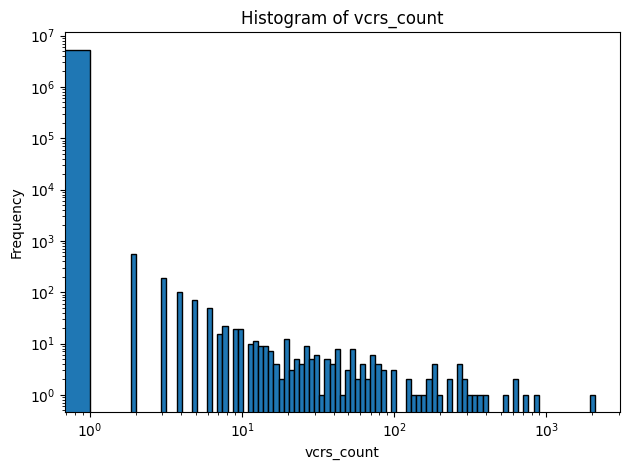

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.logspace(0, np.log10(adata.var['vcrs_count'].max() + 1), num=100)
bins = np.insert(bins, 0, 0)  # Insert 0 at the beginning
plt.hist(adata.var['vcrs_count'], bins=bins, edgecolor='black')
plt.xlabel("vcrs_count")
plt.ylabel("Frequency")
plt.title("Histogram of vcrs_count")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [6]:
adata.var.head()

,vcrs_id,vcrs_header,seq_ID,gene_name,mutation_cdna,nucleotide_positions,actual_variant,start_variant_position,end_variant_position,variant_source,vcrs_count,gene_count,number_obs
variant,,,,,,,,,,,,,
ENST00000391429:c.194C>T,ENST00000391429:c.194C>T,ENST00000391429:c.194C>T,ENST00000391429,BHLHA9,c.194C>T,194,C>T,194.0,194.0,transcriptome,0,0,0
ENST00000391429:c.128C>A,ENST00000391429:c.128C>A,ENST00000391429:c.128C>A,ENST00000391429,BHLHA9,c.128C>A,128,C>A,128.0,128.0,transcriptome,0,0,0
ENST00000391429:c.257C>A,ENST00000391429:c.257C>A,ENST00000391429:c.257C>A,ENST00000391429,BHLHA9,c.257C>A,257,C>A,257.0,257.0,transcriptome,0,0,0
ENST00000391429:c.100G>A,ENST00000391429:c.100G>A,ENST00000391429:c.100G>A,ENST00000391429,BHLHA9,c.100G>A,100,G>A,100.0,100.0,transcriptome,0,0,0
ENST00000391429:c.99G>A,ENST00000391429:c.99G>A,ENST00000391429:c.99G>A,ENST00000391429,BHLHA9,c.99G>A,99,G>A,99.0,99.0,transcriptome,0,0,0


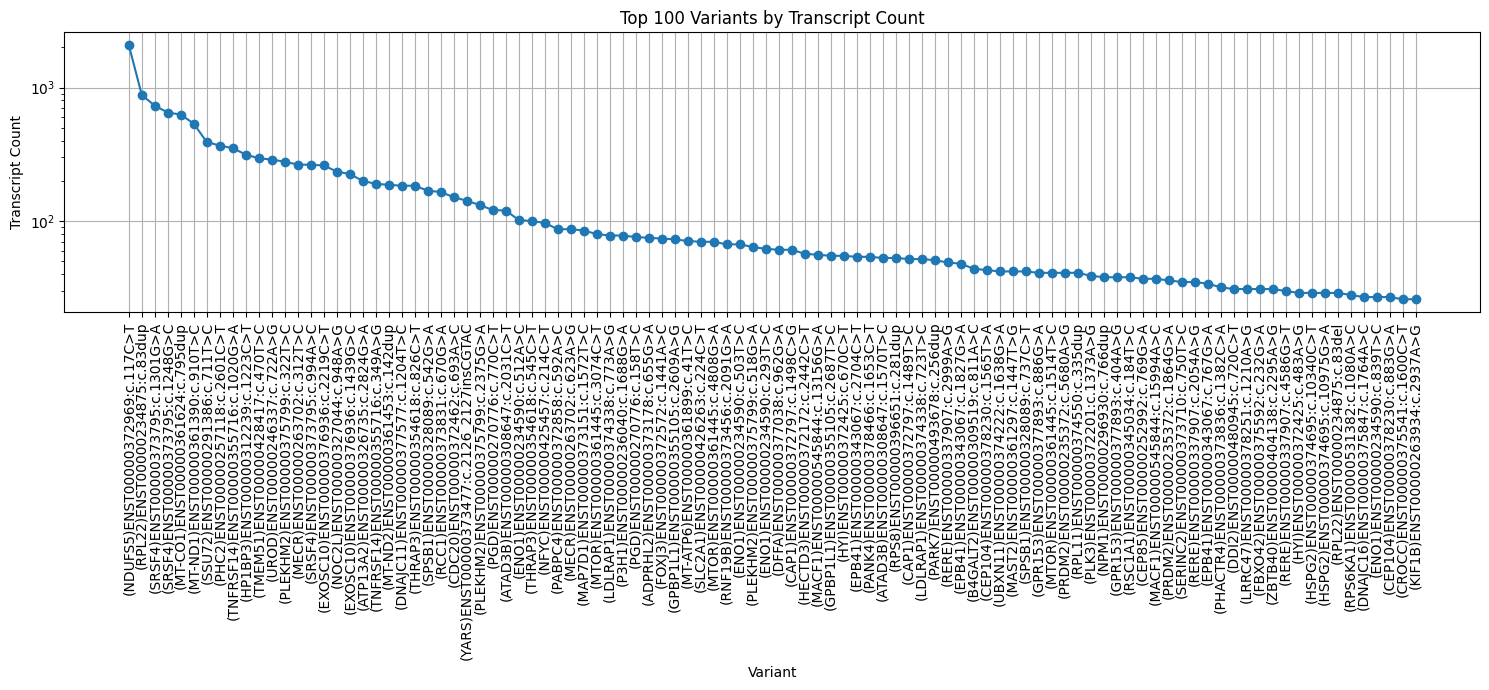

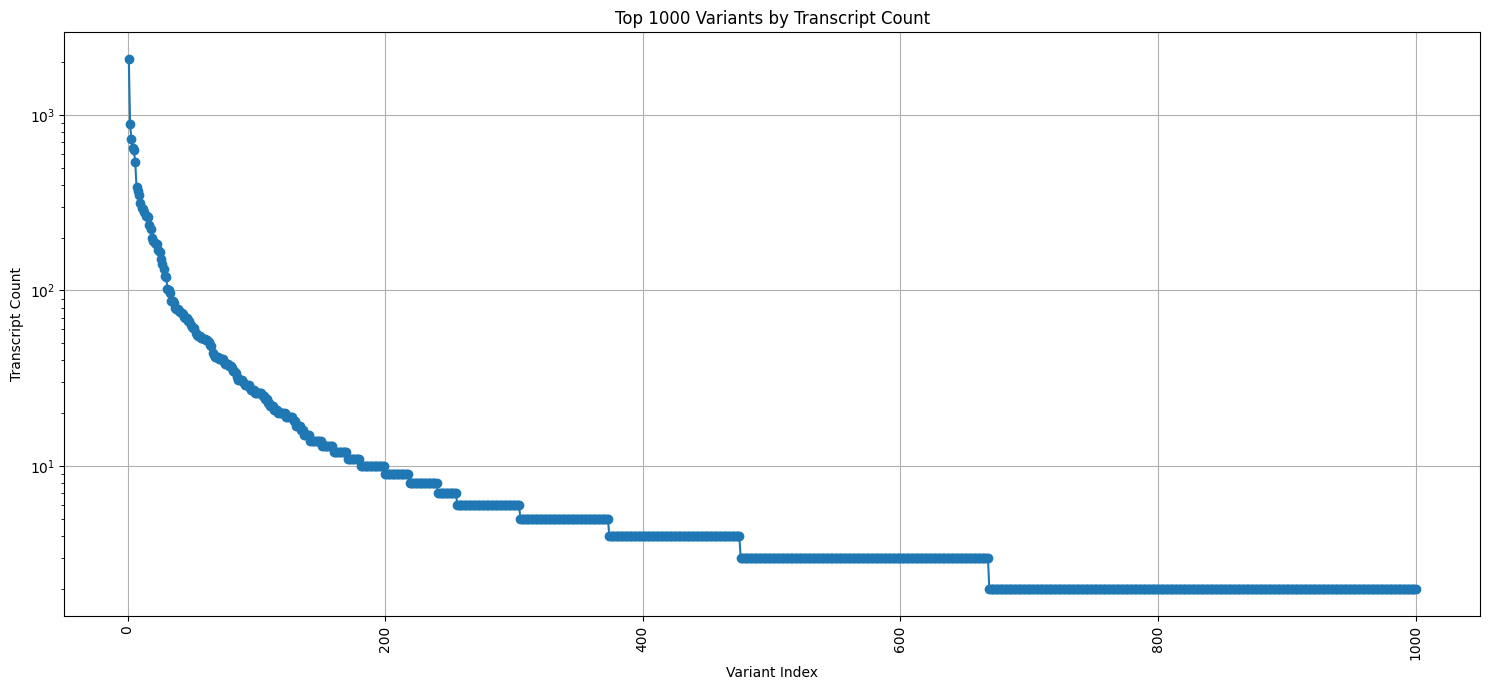

In [10]:
import importlib
import varseek.utils.visualization_utils
importlib.reload(varseek.utils.visualization_utils)
from varseek.utils.visualization_utils import plot_items_descending_order

x_column = "vcrs_header_with_gene_name" if "vcrs_header_with_gene_name" in adata.var.columns else "vcrs_id"
plot_items_descending_order(adata.var, x_column = x_column, y_column = 'vcrs_count', item_range = (0,100), show_names=True, xlabel = "Variant", title = "Top 100 Variants by Transcript Count", figsize = (15, 7), show=True)
plot_items_descending_order(adata.var, x_column = x_column, y_column = 'vcrs_count', item_range = (0,1000), show_names=False, xlabel = "Variant Index", title = "Top 1000 Variants by Transcript Count", figsize = (15, 7), show=True)

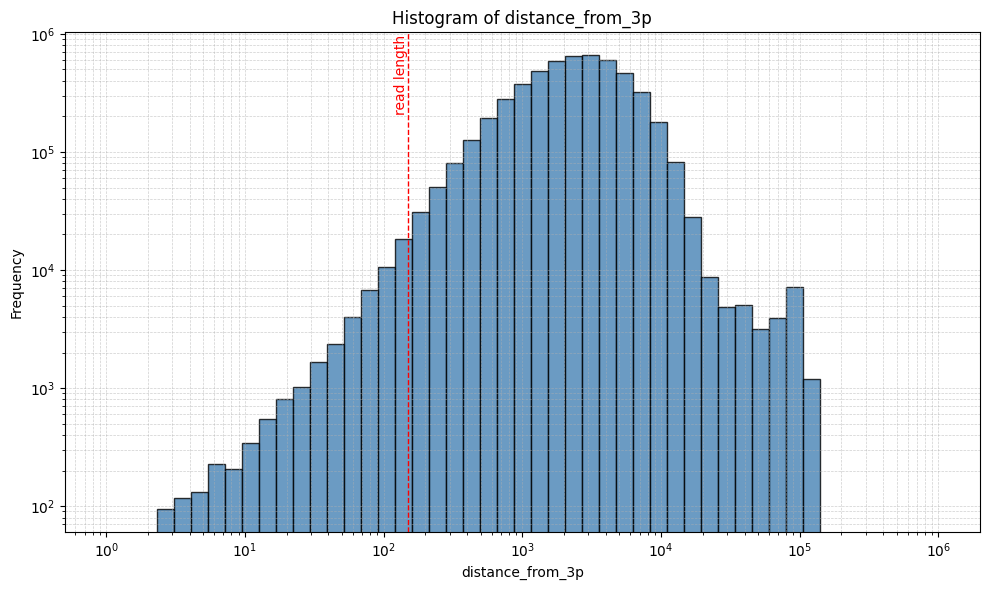

In [ ]:
import pandas as pd
import pyfastx
DPI = 300
SAVE_PDF_GLOBAL = False

def plot_cdna_locations(df, start_variant_position_cdna_column=None, end_variant_position_cdna_column=None, seq_id_column=None, cdna_fasta=None, sequence_side="both", read_length_cutoff=None, log_x=False, log_y=False, save_path=None, save_path_5p=None, save_path_3p=None, show=False, plot_style = "bar"):
    df = df.copy()
    if sequence_side not in {"5p", "3p", "both"}:
        raise ValueError("sequence_side must be '5p', '3p', or 'both'")
    cols = []
    
    if sequence_side == "5p" or sequence_side == "both":
        if start_variant_position_cdna_column is None or start_variant_position_cdna_column not in df.columns:
            raise ValueError("start_variant_position_cdna_column must be provided for 5' side analysis")
        cols.append("distance_from_5p")
        df[start_variant_position_cdna_column] = (
            pd.to_numeric(df[start_variant_position_cdna_column], errors='coerce')
            .dropna()
            .astype(int)
        )  # will drop semicolon-merged headers, as well as those with uncertain positions
        df["distance_from_5p"] = df[start_variant_position_cdna_column]
    if sequence_side == "3p" or sequence_side == "both":
        if end_variant_position_cdna_column is None or end_variant_position_cdna_column not in df.columns:
            raise ValueError("end_variant_position_cdna_column must be provided for 3' side analysis")
        if seq_id_column is None or seq_id_column not in df.columns:
            raise ValueError("seq_id_column must be provided for sequence ID analysis")
        if cdna_fasta is None or not os.path.exists(cdna_fasta):
            raise ValueError("cdna_fasta must be provided and exist for 3' side analysis")
        cols.append("distance_from_3p")
        seq_length_dict = {}
        for name, seq in pyfastx.Fastx(cdna_fasta):
            name = name.split(".")[0]
            seq_len = len(seq)
            seq_length_dict[name] = seq_len
        df["cdna_sequence_length"] = df[seq_id_column].map(seq_length_dict).dropna().astype(int)
        df[end_variant_position_cdna_column] = (
            pd.to_numeric(df[end_variant_position_cdna_column], errors='coerce')
            .dropna()
            .astype(int)
        )  # will drop semicolon-merged headers, as well as those with uncertain positions
        df = df.dropna(subset=["cdna_sequence_length", end_variant_position_cdna_column])
        df["distance_from_3p"] = df["cdna_sequence_length"] - df[end_variant_position_cdna_column]

    if sequence_side == "5p" and not save_path_5p:
        save_path_5p = save_path
    elif sequence_side == "3p" and not save_path_3p:
        save_path_3p = save_path

    for col in cols:
        valid_vals = df[col].dropna()
        max_val = valid_vals.max()
        bins = np.logspace(0, np.ceil(np.log10(max_val + 1)), num=50)

        plt.figure(figsize=(10, 6))
        if plot_style == "bar":
            plt.hist(valid_vals, bins=bins, edgecolor='black', color='steelblue', alpha=0.8)
        elif plot_style == "line":
            counts, bin_edges = np.histogram(valid_vals, bins=bins)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
            plt.plot(bin_centers, counts, marker='o', linestyle='-', color='steelblue')

        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {col}")
        if log_x:
            plt.xscale('log')
        if log_y:
            plt.yscale('log')

        if read_length_cutoff:
            plt.axvline(x=read_length_cutoff, color='red', linestyle='--', linewidth=1)
            # Optional label
            plt.text(
                read_length_cutoff,                # x-position (same as line)
                plt.ylim()[1] * 0.95,  # y-position (near top of y-axis)
                'read length',
                color='red',
                ha='right',
                va='top',
                rotation=90,
                fontsize=10
            )

        plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
        plt.tight_layout()

        save_path = save_path_5p if col == "distance_from_5p" else save_path_3p
        if save_path:
            plt.savefig(save_path, dpi=DPI)
            if SAVE_PDF_GLOBAL:
                plt.savefig(save_path.replace(".png", ".pdf"), format="pdf", dpi=DPI)
        else:
            show=True

        if show:
            plt.show()
        plt.close()

plot_cdna_locations(adata.var, cdna_fasta="/Users/joeyrich/Desktop/local/varseek/data/reference/ensembl_grch37_release93/Homo_sapiens.GRCh37.cdna.all.fa", seq_id_column="seq_ID", start_variant_position_cdna_column="start_variant_position", end_variant_position_cdna_column="end_variant_position", sequence_side="3p", log_x=True, log_y=True, read_length_cutoff=150)

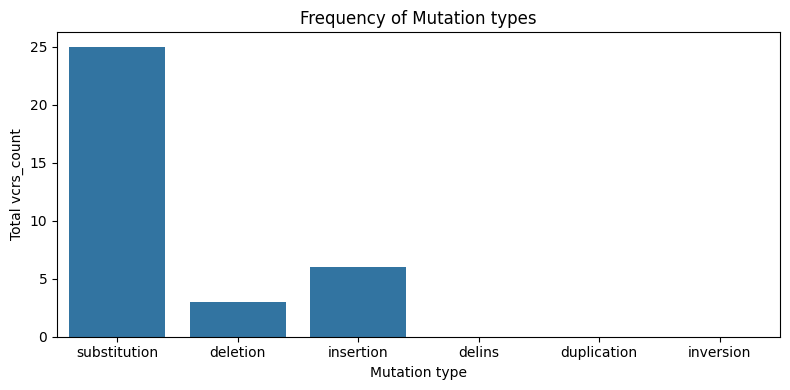

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from varseek.utils import add_variant_type

def plot_variant_types(df, variant_header_column="vcrs_header", variant_type_column = "variant_type", count_column="vcrs_count", output_file=None, show=False):
    df = df.copy()
    
    if variant_type_column not in df.columns:
        if variant_header_column not in df.columns:
            raise ValueError("variant_header_column must be in df if ref_base_column and alt_base_column are not.")
        df["variant_header_first"] = df[variant_header_column].str.split(";").str[0]  # take the first variant header
        df[["seq_ID", "variant"]] = df["variant_header_first"].str.split(":", expand=True)
        add_variant_type(df, "variant")
        df.rename(columns={"variant_type": variant_type_column}, inplace=True)

    order = ["substitution", "deletion", "insertion", "delins", "duplication", "inversion"]
    variant_type_freq = (
        df.groupby(variant_type_column)[count_column]
        .sum()
        .reindex(order)
        .fillna(0)
    )
    plt.figure(figsize=(8, 4))
    sns.barplot(x=variant_type_freq.index, y=variant_type_freq.values)
    plt.xlabel("Mutation type")
    plt.ylabel(f"Total {count_column}")
    plt.title("Frequency of Mutation types")

    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file)
    else:
        show=True

    if show:
        plt.show()
    plt.close()

def plot_substitution_heatmap(df, variant_header_column="vcrs_header", ref_base_column="ref_base", alt_base_column="alt_base", count_column="vcrs_count", output_file=None, show=False, plot_type="heatmap"):
    df = df.copy()

    if plot_type not in {"heatmap", "bar"}:
        raise ValueError("plot_type must be heatmap or bar")

    if ref_base_column not in df.columns or alt_base_column not in df.columns:
        if variant_header_column not in df.columns:
            raise ValueError("variant_header_column must be in df if ref_base_column and alt_base_column are not.")
        df["variant_header_first"] = df[variant_header_column].str.split(";").str[0]  # take the first variant header
        df = df.loc[(df["variant_header_first"].str.contains(">")), "variant_header_first"]  # keep only substitutions     # & (~df[variant_header_column].str.contains(";"))
        df[ref_base_column] = df["variant_header_first"].str.split(">").str[1].str[0]
        df[alt_base_column] = df["variant_header_first"].str.split(">").str[1].str[2]
    
    # 1. Ensure uppercase
    df[ref_base_column] = df[ref_base_column].str.upper()
    df[alt_base_column] = df[alt_base_column].str.upper()

    # 2. Convert to categorical (optional but useful for ordering)
    bases = ["A", "C", "G", "T"]
    df[ref_base_column] = pd.Categorical(df[ref_base_column], categories=bases, ordered=True)
    df[alt_base_column] = pd.Categorical(df[alt_base_column], categories=bases, ordered=True)

    if plot_type == "heatmap":
        # 3. Group and pivot to build matrix
        heatmap_data = (
            df.groupby([ref_base_column, alt_base_column])[count_column]
            .sum()
            .unstack(fill_value=0)
        )

        # 4. Plot heatmap
        plt.figure(figsize=(6, 5))
        sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds")
        plt.title(f"Sum of {count_column} by ref base and alt base")
        plt.xlabel(alt_base_column)
        plt.ylabel(ref_base_column)

    elif plot_type == "bar":
        df["substitution"] = df["ref_base"].str.upper() + ">" + df["alt_base"].str.upper()
        substitution_freq = df.groupby("substitution")[count_column].sum().sort_index()  # .sort_values(ascending=False) for descending
        plt.figure(figsize=(8, 4))
        sns.barplot(x=substitution_freq.index, y=substitution_freq.values)
        plt.xlabel("Substitution")
        plt.ylabel(f"Total {count_column}")
        plt.title("Frequency of Substitution Types")
    
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file)
    else:
        show=True

    if show:
        plt.show()
    plt.close()



# df = pd.DataFrame({
#     "ref_base": ["A", "A", "A", "C", "C", "G", "T", "T", "G", "C", "T", "A"],
#     "alt_base": ["G", "C", "T", "T", "A", "A", "A", "G", "C", "G", "C", "G"],
#     "vcrs_count": [10, 5, 2, 8, 3, 6, 4, 9, 1, 7, 2, 5],
#     "vcrs_detected": [True, True, True, True, True, True, True, True, True, True, True, True]
# })
# plot_substitution_heatmap(df, show=True, count_column="vcrs_detected", plot_type="bar")
df = pd.DataFrame({
    "vcrs_header": ["VAR1:c.1A>G", "VAR2:c.1C>T", "VAR3:c.2G>A", "VAR4:c.2T>C", "VAR5:c.2del", "VAR6:c.3_4insAAG"],
    "vcrs_detected": [True, True, True, True, True, True],
    "vcrs_count": [10, 5, 2, 8, 3, 6]
})
plot_variant_types(df, variant_header_column="vcrs_header", count_column="vcrs_count", show=True)